In [33]:
import pandas
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

plt.rcParams['figure.figsize']=(15,2)


In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

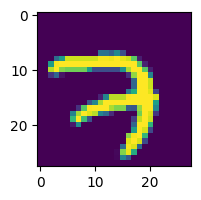

In [9]:
plt.imshow(X_train[5000])

In [30]:
def plot_image(X_data, y_data, index):
  fig=plt.imshow(X_data[index])
  plt.title(f"Actual: {y_data[index]}")
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)

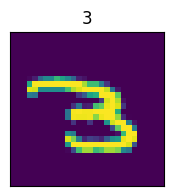

In [17]:
plot_image(250)

In [14]:
X_train[200]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 197,
        255,  84,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  85, 251,
        253,  83,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  86, 253,
        254, 253,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  85, 251,
        253, 251,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  86, 253,
        254, 253, 169,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  85, 251,
        253, 251, 168,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  86, 253,
        254, 253, 169,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  28, 196,
        253, 251, 168,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 169,
        254, 253, 169,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 168,
        253, 251, 168,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 169,
        254, 253, 169,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 168,
        253, 251, 168,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        254, 253, 254, 139,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        253, 251, 253, 251,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        254, 253, 254, 253,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        253, 251, 253, 251, 168,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        198, 253, 254, 253, 114,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         85, 251, 253, 251,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         85, 253, 254, 253,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         28,  83, 196,  83,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [18]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [19]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=10, batch_size=1000)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.7650 - loss: 0.8913
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.9521 - loss: 0.1682
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9699 - loss: 0.1075
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.9773 - loss: 0.0777
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.9837 - loss: 0.0566
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.9878 - loss: 0.0419
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.9903 - loss: 0.0333
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.9936 - loss: 0.0240
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.9955 - loss: 0.0183
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.9965 - loss: 0.0133


In [20]:
loss, accuracy=model.evaluate(X_test_scaled,y_test)
accuracy*100

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9773 - loss: 0.0793


98.07000160217285

In [21]:
pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [22]:
y_test[400]

np.uint8(2)

In [23]:
np.argmax(pred[400])

np.int64(2)

In [24]:
pred[400]

array([0.        , 0.        , 0.99999994, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [25]:
pred_values=[np.argmax(value) for value in pred]

In [26]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [28]:
pred_values[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

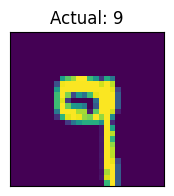

In [31]:
plot_image(X_test, pred_values, 6000)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred_values))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.94      0.97       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<Axes: >

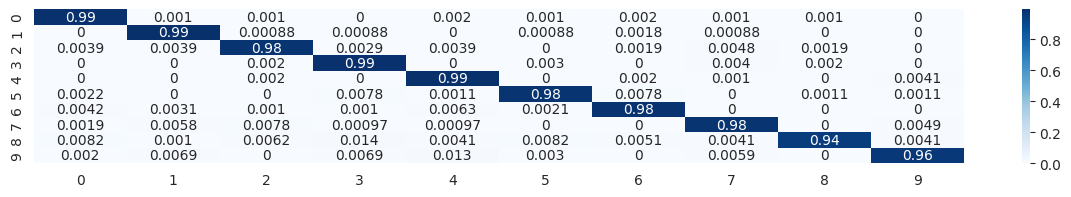

In [36]:
cf=confusion_matrix(y_test,pred_values, normalize='true')
sns.heatmap(cf, annot=True, cmap='Blues')